## Experimental Illustration

In this experiment, we compare two neural network architectures:

- **Shallow Network:** 2 hidden layers.
- **Deep Network:** 10 hidden layers.

**Goal:** Demonstrate that a deep network is much more effective at approximating a highly oscillatory function than a shallow network.

**Dataset:** Synthetic dataset generated from a sine function with high frequency.

**Metric:** Mean Squared Error (MSE).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# For reproducibility
np.random.seed(0)
tf.random.set_seed(0)



## Dataset Creation
 
 We generate 1000 points in [0,1] and define our target function as:
 
$$
 f(x) = \sin(10\pi x)
$$
 
 This function oscillates rapidly, making it challenging to approximate.


<Figure size 640x480 with 0 Axes>

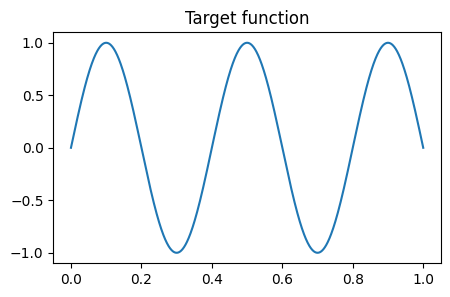

In [69]:
# Generate synthetic dataset
x = np.linspace(0, 1, 1000).reshape(-1, 1)
y = np.sin(5 * np.pi * x)

# Plot the target function
plt.figure()
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.title('Target function')
plt.show()


## Model Definitions

We define two models:

1. **Shallow Model:** 2 hidden layers with 96 neurons each.
2. **Deep Model:** 10 hidden layers with 32 neurons each.

Both models use ReLU activations in the hidden layers and a linear activation at the output.


In [61]:
def build_shallow_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(96, activation='relu'),
        Dense(96, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

def build_deep_model():
    layers = [Input(shape=(1,))]
    for _ in range(10):  # 10 hidden layers for the deep network
        layers.append(Dense(32, activation='relu'))
    layers.append(Dense(1, activation='linear'))
    model = Sequential(layers)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
    return model


## Training

We train both models on the same dataset for 200 epochs.

In [62]:
# Build models
shallow_model = build_shallow_model()
deep_model = build_deep_model()

# Train the shallow network
history_shallow = shallow_model.fit(x, y, epochs=200, verbose=1)

# Train the deep network
history_deep = deep_model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4981  
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4934
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4923
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4914
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4905
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4896
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4887
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4879
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4871
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4862
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4854
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4845
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4835
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4826 
Epoch 15/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4816 


## Evaluation

We predict the function values on the entire domain and compute the Mean Squared Error (MSE).

In [63]:
# Predictions
y_pred_shallow = shallow_model.predict(x)
y_pred_deep = deep_model.predict(x)

# Compute MSE
mse_shallow = np.mean((y - y_pred_shallow) ** 2)
mse_deep = np.mean((y - y_pred_deep) ** 2)
print(f"Shallow Network MSE: {mse_shallow:.4f}")
print(f"Deep Network MSE: {mse_deep:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Shallow Network MSE: 0.3414
Deep Network MSE: 0.0001


## Plotting Results

The plots below compare the ground truth function with the predictions of both networks.
The deep network is expected to capture the oscillations much better than the shallow network.

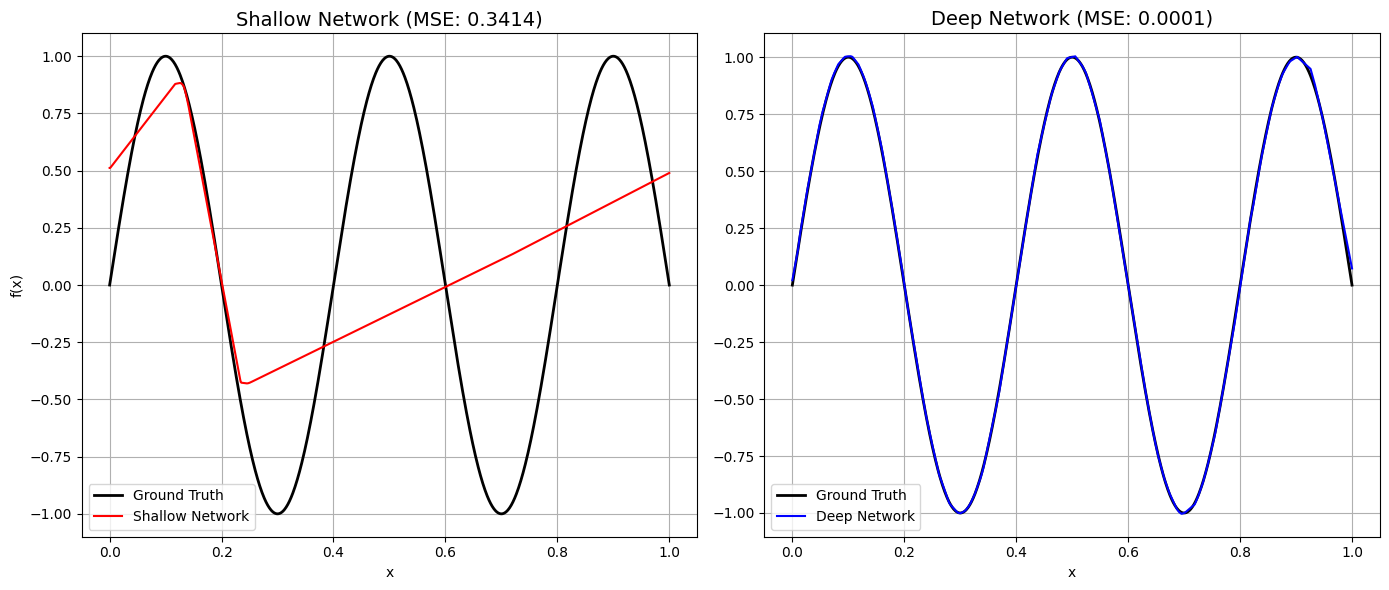

In [64]:

plt.figure(figsize=(14, 6))

# Shallow Network Plot
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Ground Truth', color='black', linewidth=2)
plt.plot(x, y_pred_shallow, label='Shallow Network', color='red', linewidth=1.5)
plt.title(f'Shallow Network (MSE: {mse_shallow:.4f})', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Deep Network Plot
plt.subplot(1, 2, 2)
plt.plot(x, y, label='Ground Truth', color='black', linewidth=2)
plt.plot(x, y_pred_deep, label='Deep Network', color='blue', linewidth=1.5)
plt.title(f'Deep Network (MSE: {mse_deep:.4f})', fontsize=14)
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Conclusion

As expected, the **deep network** is able to approximate the highly oscillatory function much more accurately than the **shallow network**. The deep architecture, with its increased depth, captures the rapid oscillations, while the shallow network struggles, as demonstrated by the higher MSE and the visual fit.
